In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import gc

In [2]:
from tqdm import tqdm

# Load data
train_df = pd.read_csv("../WiDS Data/TrainingWiDS2021.csv")
test_df = pd.read_csv("../WiDS Data/UnlabeledWiDS2021.csv")
data_dictionary_df = pd.read_csv("../WiDS Data/DataDictionaryWiDS2021.csv")
sample_sub_df = pd.read_csv("../WiDS Data/SampleSubmissionWiDS2021.csv")
sol_temp_df = pd.read_csv("../WiDS Data/SolutionTemplateWiDS2021.csv")

In [7]:
modified_dataset_path = "../Modified Datasets/"

**missing values**

In [3]:
#Missing Value Counts
mis_val = train_df.isnull().sum()
# Percentage of missing values
mis_val_percent = 100 * train_df.isnull().sum() / len(train_df)
# Make a table with the results
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  
# Sort the table by percentage of missing descending
mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
  
# Print some summary information
print ("Your selected dataframe has " + str(train_df.shape[1]) + " columns.\n"  +
 "There are " + str(mis_val_table_ren_columns.shape[0]) +
 " columns that have missing values.")
# Missing values for training data
mis_val_table_ren_columns[:20].style.background_gradient(cmap='Blues')

Your selected dataframe has 181 columns.
There are 160 columns that have missing values.


,Missing Values,% of Total Values
h1_bilirubin_min,119861,92.100000
h1_bilirubin_max,119861,92.100000
h1_albumin_max,119005,91.400000
h1_albumin_min,119005,91.400000
h1_lactate_max,118467,91.000000
h1_lactate_min,118467,91.000000
h1_pao2fio2ratio_min,113397,87.100000
h1_pao2fio2ratio_max,113397,87.100000
h1_arterial_ph_max,107849,82.900000
h1_arterial_ph_min,107849,82.900000


In [4]:
train_df.dropna(subset=['gender', 'ethnicity'], axis='rows', inplace=True)

train_df['hospital_admit_source']=train_df['hospital_admit_source'].fillna(train_df['hospital_admit_source'].mode()[0])
print(train_df['hospital_admit_source'].unique())

train_df['icu_admit_source']=train_df['icu_admit_source'].fillna(train_df['icu_admit_source'].mode()[0])
print(train_df['icu_admit_source'].unique())

train_df['icu_stay_type']=train_df['icu_stay_type'].fillna(train_df['icu_stay_type'].mode()[0])
print(train_df['icu_stay_type'].unique())

train_df['icu_type']=train_df['icu_type'].fillna(train_df['icu_type'].mode()[0])
print(train_df['icu_type'].unique())

['Floor' 'Emergency Department' 'Operating Room' 'Direct Admit'
 'Other Hospital' 'Other ICU' 'ICU to SDU' 'Recovery Room'
 'Chest Pain Center' 'Step-Down Unit (SDU)' 'Acute Care/Floor' 'PACU'
 'Observation' 'ICU' 'Other']
['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU']
['admit' 'readmit' 'transfer']
['CTICU' 'Med-Surg ICU' 'CCU-CTICU' 'Neuro ICU' 'MICU' 'SICU'
 'Cardiac ICU' 'CSICU']


In [5]:
num_cols = train_df.select_dtypes(include=['int64','float64'])
for col in num_cols:
    #train_df.iloc[:,col]=train_df.iloc[:,col].fillna(train_df.iloc[:,col].median()[0])
    train_df.loc[:, col] = train_df.loc[:, col].fillna(train_df.loc[:, col].median())

In [8]:
# train_df.to_csv(modified_dataset_path + 'data_missing_clean.csv')

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

for c in (train_df.select_dtypes(include=['object'])):
    le = preprocessing.LabelEncoder()
    train_df[c] = le.fit_transform(train_df[c])

In [10]:
train_df.info(verbose=True,  show_counts=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128543 entries, 0 to 130156
Data columns (total 181 columns):
 #    Column                       Non-Null Count   Dtype  
---   ------                       --------------   -----  
 0    Unnamed: 0                   128543 non-null  int64  
 1    encounter_id                 128543 non-null  int64  
 2    hospital_id                  128543 non-null  int64  
 3    age                          128543 non-null  float64
 4    bmi                          128543 non-null  float64
 5    elective_surgery             128543 non-null  int64  
 6    ethnicity                    128543 non-null  int32  
 7    gender                       128543 non-null  int32  
 8    height                       128543 non-null  float64
 9    hospital_admit_source        128543 non-null  int32  
 10   icu_admit_source             128543 non-null  int32  
 11   icu_id                       128543 non-null  int64  
 12   icu_stay_type                128543 non-nu

In [11]:
#Identifier columns
id_cols = ['Unnamed: 0','encounter_id','hospital_id','icu_id','readmission_status']
#drop the identifier columns
train_df.drop(id_cols,axis=1,inplace=True)

In [12]:
# train_df.to_csv(modified_dataset_path + 'data_missing_clean_and_pruned.csv')

**power transform**

In [61]:
# a = 61  # number of rows
# b = 3  # number of columns

# fig = plt.figure(figsize=(40,40))

# for i , col in enumerate(train_df.columns, 1):
#     plt.subplot(a, b, i)
#     plt.title(f'{col} distplot')
#     sns.histplot(x = train_df[col])
#     plt.subplots_adjust(hspace = 0.1)

# plt.tight_layout()
# plt.show()

In [13]:
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

y = train_df

pt = PowerTransformer(method='yeo-johnson', standardize=False)

y_tf = pt.fit_transform(y)

power_tf = pd.DataFrame(y_tf,columns=y.columns)

In [71]:
# tt=pd.DataFrame(y_tf,columns=train_df.columns)
    
# a = 3  # number of rows
# b = 3  # number of columns

# fig = plt.figure(figsize=(20,40))

# for i , col in enumerate(tt.columns, 1):
#     plt.subplot(a, b, i)
#     plt.title(f'{col} distplot')
#     sns.distplot(x = tt[col])

# plt.tight_layout()
# plt.show()

In [72]:
# sns.distplot(power_tf)

In [14]:
# power_tf.to_csv(modified_dataset_path + 'data_power.csv')

In [15]:
from sklearn.preprocessing import StandardScaler

p = power_tf

p_norm = StandardScaler().fit_transform(p)

p_normal = pd.DataFrame(p_norm, columns=p.columns)

#pd.DataFrame(p_normal).plot.box(figsize=(90,5), rot=90)

In [16]:
# pd.DataFrame(p_normal).to_csv(modified_dataset_path + 'data_power_norm.csv')

**normalization**

<AxesSubplot:>

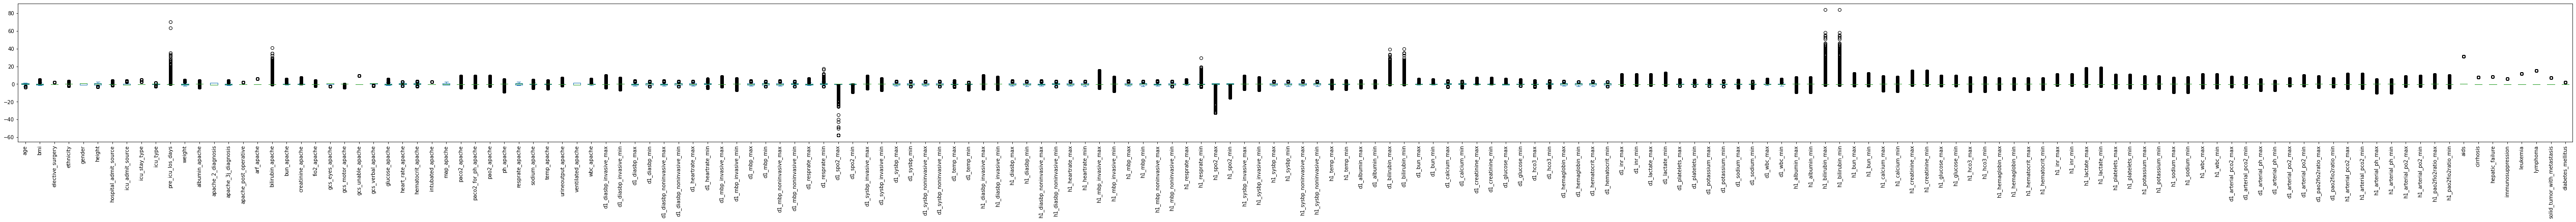

In [17]:
from sklearn.preprocessing import StandardScaler

X_train = train_df

X_train_norm = StandardScaler().fit_transform(X_train)

normal_data= pd.DataFrame(X_train_norm, columns=X_train.columns)

pd.DataFrame(normal_data).plot.box(figsize=(90,5), rot=90)


In [18]:
# pd.DataFrame(normal_data).to_csv('data_norm.csv')

**pca**

In [19]:
from sklearn.decomposition import PCA

yy= normal_data

a = yy.drop(columns='diabetes_mellitus')
b = yy['diabetes_mellitus']

pca = PCA(n_components=4)
data_pca= pca.fit_transform(a)

In [20]:
# pd.DataFrame(data_pca).to_csv(modified_dataset_path + 'data_pca.csv')